In [2]:
import gensim
from glove_code.src.glove import Glove
from gensim.models.keyedvectors import PoincareWordEmbeddingsKeyedVectors as pkv
from gensim.matutils import argsort
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
from numpy import dot
import os
import plotly
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import random
from scipy import stats
random.seed(42)

# plotly.tools.set_credentials_file(username='alex-tifrea', api_key='MTEfiBZpFVHiVr9AZcvW')
init_notebook_mode(connected=True)
ROOT = "/Users/alext/Documents/Master/Thesis/"

# Correlation between norm and word frequency

In [7]:
w2v_model_fn = os.path.join(ROOT, "models/glove/glove_baseline/glove_ep50_size100_lr0.05_vocab200000_vanilla_OPTadagrad_COOCCFUNClog_bias")
w2v_model = Glove.load(w2v_model_fn)
w2v_wv = w2v_model.wv

In [5]:
# hyp_model_fn = os.path.join(ROOT, "models/glove/geometric_emb/glove_ep50_size100_lr0.05_vocab200000_poincare_OPTradagrad_COOCCFUNClog_DISTFUNCdist-sq_bias")
hyp_model_fn = os.path.join(ROOT, "models/glove/geometric_emb/glove_ep50_size100_lr0.01_vocab200000_poincare_OPTradagrad_COOCCFUNClog_DISTFUNCcosh-dist-sq_bias")
hyp_model = Glove.load(hyp_model_fn)
hyp_wv = hyp_model.wv

In [8]:
restrict_vocab = range(len(w2v_wv.index2word))[10000:]
word_freq = np.array([w2v_wv.vocab[word].count for word in w2v_wv.index2word])[restrict_vocab]
w2v_vector_norms = norm(w2v_wv.vectors, axis=1)[restrict_vocab]
hyp_target_vector_norms = norm(hyp_wv.vectors, axis=1)[restrict_vocab]
hyp_context_vector_norms = norm(hyp_model.trainables.syn1neg, axis=1)[restrict_vocab]
# hyp_biases = hyp_bias = hyp_model.trainables.b1[:restrict_vocab]

print("Spearman correlation between Word2Vec vector norms and word frequency:", 
      stats.spearmanr(1.0/word_freq, w2v_vector_norms)[0])
print("Spearman correlation between Poincare target vector norms and word frequency:", 
      stats.spearmanr(1.0/word_freq, hyp_target_vector_norms)[0])
print("Spearman correlation between Poincare context vector norms and word frequency:", 
      stats.spearmanr(1.0/word_freq, hyp_context_vector_norms)[0])
# print("Spearman correlation between Poincare biases and word frequency:", 
#       stats.spearmanr(word_freq, hyp_biases)[0])

print(stats.spearmanr(hyp_target_vector_norms, hyp_context_vector_norms)[0])

Spearman correlation between Word2Vec vector norms and word frequency: -0.6106564183336157
Spearman correlation between Poincare target vector norms and word frequency: -0.6943054527944904
Spearman correlation between Poincare context vector norms and word frequency: -0.6946537982528225
0.9980788157194617


## Vector norms (dot product model vs Glove Poincare model)

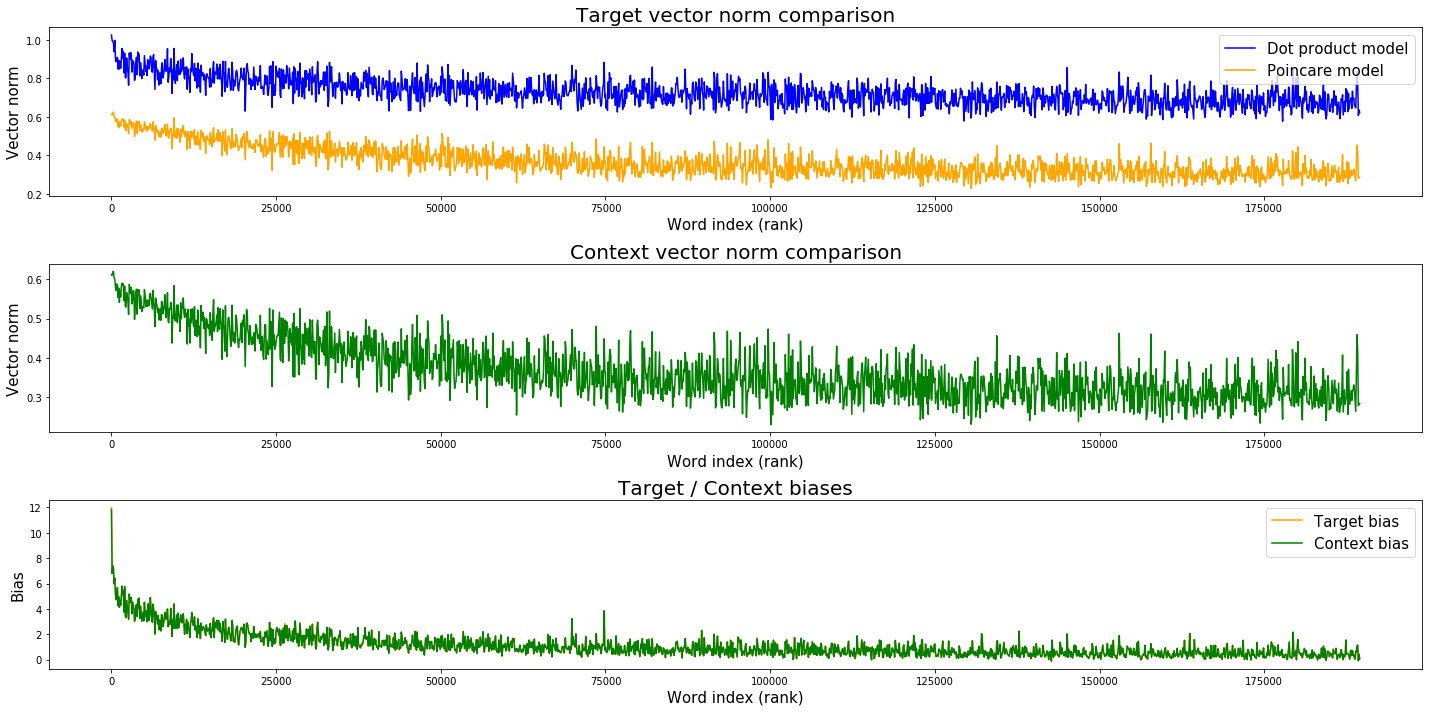

In [9]:
restrict_vocab = 10000

# Plot target vector norms.
fig = plt.figure(figsize=(20, 10))
x = range(len(hyp_wv.index2entity))
dotprod_norms = [norm(w2v_wv.word_vec(w)) for w in w2v_wv.index2entity]
hyp_norms = [norm(hyp_wv.word_vec(w)) for w in hyp_wv.index2entity]

plt.subplot(311)
l1, = plt.plot(x[::100], np.sqrt(dotprod_norms[::100]) / 2, color="blue")
l2, = plt.plot(x[::100], hyp_norms[::100], color="orange")
plt.legend([l1, l2], ["Dot product model", "Poincare model"], fontsize=15)
plt.ylabel("Vector norm", fontsize=15)
plt.xlabel("Word index (rank)", fontsize=15)
_ = plt.title("Target vector norm comparison", fontsize=20)


# Plot context vector norms.
dotprod_norms = [norm(w2v_model.trainables.syn1neg[idx]) for idx in x]
hyp_norms = [norm(hyp_model.trainables.syn1neg[idx]) for idx in x]

plt.subplot(312)
# l1, = plt.plot(x[::100], dotprod_norms[::100], color="blue")
l2, = plt.plot(x[::100], hyp_norms[::100], color="green")
# plt.legend([l1, l2], ["Dot product model", "Poincare model"], fontsize=15)
plt.ylabel("Vector norm", fontsize=15)
plt.xlabel("Word index (rank)", fontsize=15)
_ = plt.title("Context vector norm comparison", fontsize=20)


# Plot biases for Poincare GloVe
target_biases = hyp_model.trainables.b0[x]
context_biases = hyp_model.trainables.b1[x]
plt.subplot(313)
l1, = plt.plot(x[::100], target_biases[::100], color="orange")
l2, = plt.plot(x[::100], context_biases[::100], color="green")
plt.legend([l1, l2], ["Target bias", "Context bias"], fontsize=15)
plt.ylabel("Bias", fontsize=15)
plt.xlabel("Word index (rank)", fontsize=15)
_ = plt.title("Target / Context biases", fontsize=20)

fig.tight_layout()

#### Vector norm analysis

In [52]:
w2v_model_fn = os.path.join(ROOT, "models/glove/glove_baseline/glove_ep50_size100_lr0.05_vocab400000_vanilla_OPTadagrad_COOCCFUNClog_bias")
w2v_model = Glove.load(w2v_model_fn)
w2v_wv = w2v_model.wv

In [10]:
# hyp_model_fn = os.path.join(ROOT, "models/glove/geometric_emb/glove_ep50_size100_lr0.05_vocab400000_poincare_OPTwfullrsgd_COOCCFUNClog_DISTFUNCdist-sq_bias")
hyp_model_fn = os.path.join(ROOT, "models/glove/geometric_emb/glove_ep50_size100_lr0.01_vocab200000_poincare_OPTradagrad_COOCCFUNClog_DISTFUNCcosh-dist-sq_bias")
hyp_model = Glove.load(hyp_model_fn)
hyp_wv = hyp_model.wv

In [54]:
hyp_norms = np.linalg.norm(hyp_wv.vectors, axis=1)
print("Average vector mean:", np.average(hyp_norms), "; Stddev norms =", np.std(hyp_norms), "; Min norm =", 
      np.min(hyp_norms), "; Max norm =", np.max(hyp_norms))

Average vector mean: 0.65279806 ; Stddev norms = 0.050093923 ; Min norm = 0.20212811 ; Max norm = 0.91619146


In [55]:
w2v_norms = np.linalg.norm(w2v_wv.vectors, axis=1)
print("Average vector norm:", np.average(w2v_norms), "; Stddev norms =", np.std(w2v_norms), "; Min norm =", 
      np.min(w2v_norms), "; Max norm =", np.max(w2v_norms))

Average vector norm: 1.9224478 ; Stddev norms = 0.47720724 ; Min norm = 0.2849181 ; Max norm = 5.0368977


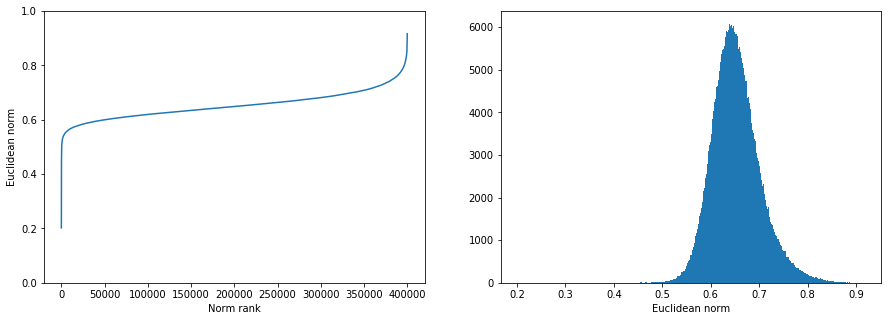

In [56]:
lim = list(range(len(hyp_norms)))[:]
fig = plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.plot(np.array(range(len(hyp_norms)))[lim], np.array(sorted(hyp_norms))[lim]) 
plt.ylim([0, 1])
plt.xlabel("Norm rank")
plt.ylabel("Euclidean norm")
plt.subplot(122)
plt.hist(hyp_norms, bins="auto")
_ = plt.xlabel("Euclidean norm")

## Nearest neighbors

#### Compute Relative Contrast of a model

In [57]:
w2v_model_fn = os.path.join(ROOT, "models/glove/glove_baseline/glove_ep50_size100_lr0.05_vocab400000_vanilla_OPTadagrad_COOCCFUNClog_bias")
w2v_model = Glove.load(w2v_model_fn)
w2v_wv = w2v_model.wv

In [26]:
hyp_model_fn = os.path.join(ROOT, "models/glove/geometric_emb/glove_ep50_size100_lr0.05_vocab200000_poincare_OPTradagrad_COOCCFUNClog_DISTFUNCdist-sq_bias")
# hyp_model_fn = os.path.join(ROOT, "models/glove/geometric_emb/glove_ep50_size100_lr0.01_vocab200000_poincare_OPTradagrad_COOCCFUNClog_DISTFUNCcosh-dist-sq_bias")
hyp_model = Glove.load(hyp_model_fn)
hyp_wv = hyp_model.wv

In [65]:
restrict_vocab=500000
def compute_relative_contrast(index, wv):
    limited = np.delete(wv.vectors[:restrict_vocab], index, 0)
    dists = wv.distances(wv.vectors[index], limited)
    min_dist = np.min(dists)
    mean_dist = np.average(dists)
    return mean_dist / (min_dist + 1e-15)

def compute_avg_relative_contrast(wv, num_queries=100):
    indexes = random.sample(range(100), num_queries) + random.sample(range(100, min(restrict_vocab, len(wv.vocab))), num_queries)
    rcs = []
    for idx in indexes:
        rcs.append(compute_relative_contrast(idx, wv))
    
#     print(list(zip(indexes, rcs)))

    print("Average Relative Contrast (top 100 words):", np.average(np.array(rcs[:num_queries])))
    print("Average Relative Contrast (rest of the words):", np.average(np.array(rcs[num_queries:])))
    print("Average Relative Contrast:", np.average(np.array(rcs)))

In [71]:
compute_avg_relative_contrast(wv=hyp_wv, num_queries=100)

Average Relative Contrast (top 100 words): 4.458971430253542
Average Relative Contrast (rest of the words): 2.0260045910558118
Average Relative Contrast: 3.2424880106546765


In [72]:
compute_avg_relative_contrast(wv=w2v_wv, num_queries=100)

Average Relative Contrast (top 100 words): 16.09661641477659
Average Relative Contrast (rest of the words): 2.3211328188321727
Average Relative Contrast: 9.208874616804382


#### Relative contrast analysis (looking at the distance distribution for the neighbors of a word)

[Vanilla GloVe] Target word "color": 138941 6.418441045866453
	Avg: 1.0693398 ; stddev: 0.11911726 ; min: 0.16660428 ; max: 1.4714054
[Poincare GloVe] Target word "color": 138941 3.0472704066349956
	Avg: 8.0282955 ; stddev: 0.97242707 ; min: 2.6345859 ; max: 22.998543


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



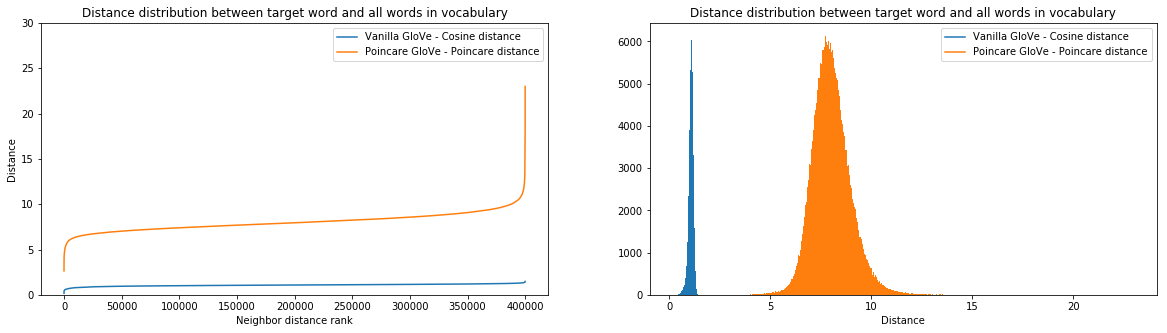

In [80]:
fig = plt.figure(figsize=(20, 5))
def analyze_nearest_neighbors(wv, emb_type):
    restrict_vocab = 500000
    word = "color"
    index = wv.vocab[word].index
    print("["+emb_type+"] Target word \""+word+"\":", wv.vocab[word].count, compute_relative_contrast(index, wv))
    limited = np.delete(wv.vectors[:restrict_vocab], index, 0)
    dists = wv.distances(wv.vectors[index], limited).reshape(-1,)

    print("\tAvg:", np.average(dists), "; stddev:", np.std(dists), "; min:", np.min(dists), "; max:", np.max(dists))

    plt.subplot(121)
    plot_num=2000
    l, = plt.plot(list(range(len(limited))), sorted(dists))
    
    plt.subplot(122)
    plt.hist(dists, bins="auto")

    return l, go.Scatter(
        x=list(range(len(limited)))[:plot_num],
        y=sorted(dists)[:plot_num],
        mode="lines+markers",
        name=emb_type)
    
l1, t1 = analyze_nearest_neighbors(w2v_wv, "Vanilla GloVe")
l2, t2 = analyze_nearest_neighbors(hyp_wv, "Poincare GloVe")

iplot(dict(data=[t1, t2]))

plt.subplot(121)
plt.legend([l1, l2], ["Vanilla GloVe - Cosine distance", "Poincare GloVe - Poincare distance"])
plt.ylim((0, 30))
plt.xlabel("Neighbor distance rank")
plt.ylabel("Distance")
plt.title("Distance distribution between target word and all words in vocabulary")

plt.subplot(122)
plt.legend([l1, l2], ["Vanilla GloVe - Cosine distance", "Poincare GloVe - Poincare distance"])
plt.xlabel("Distance")
_ = plt.title("Distance distribution between target word and all words in vocabulary")


#### Nearest neighbors queries

In [4]:
def cosine_distance(vector, other_vectors):
    return 1 - gensim.models.keyedvectors.VanillaWordEmbeddingsKeyedVectors.cosine_similarities(
        vector, other_vectors)

def gyrocosine_distance(vector, other_vectors):
    other_vectors_norm = other_vectors / (pkv.embedding_norms_mat(other_vectors)[:, None] + 1e-10)
    vector_norm = vector / (hyp_wv.embedding_norm(word_or_vector=vector) + 1e-10)
    return 1 - (other_vectors_norm * vector_norm).sum(axis=1)

def poincare_distance(vector, other_vectors):
    diff = other_vectors - vector
    alpha_v = 1.0 / (1 - np.dot(vector, vector))
    beta_w = 1.0 / (1 - (other_vectors * other_vectors).sum(axis=1))
    return np.arccosh(1 + 2 * (diff * diff).sum(axis=1) * alpha_v * beta_w)

def get_knn(query, distance, curr_wv, k=10, restrict_vocab=200000):
    index = curr_wv.vocab[query].index
    limited = curr_wv.vectors[:restrict_vocab]
    dists = distance(curr_wv.vectors[index], limited)
    knn_indexes = gensim.matutils.argsort(dists, topn=k)
    return list(zip([curr_wv.index2word[idx] for idx in knn_indexes], 
                    np.around(dists[knn_indexes], decimals=3), 
                    [norm(hyp_wv.vectors[idx]) for idx in knn_indexes]))
#     return [curr_wv.index2word[idx] for idx in knn_indexes]


#### Vectors that are closest to the CENTER of the ball

In [81]:
norms = list(zip(range(len(hyp_wv.vectors)), norm(hyp_wv.vectors, axis=1)))
norms = sorted(norms, key=lambda x: x[1])
# print([(hyp_wv.index2word[idx], curr_norm) for idx, curr_norm in norms[:100]])
print([hyp_wv.index2word[idx] for idx, curr_norm in norms[:100]])

['alola', 'arecoideae', 'gnetophytes', 'chennselaig', 'wesleys', 'duckwater', 'sedena', 'apparatchiks', 'replanning', 'barraki', 'stilbenoid', 'clarsach', 'nsro', 'salmacis', 'shedu', 'qornet', 'biomembrane', 'darwinek', 'mohilev', 'supplemental2', '30t19', 'kimche', 'ouham', 'drugbank2', 'calormenes', 'nsnechta', 'nerode', 'pinguins', 'nekyia', 'khalisa', 'wentworths', 'tyskie', 'monoplacophora', 'bilafond', 'eureca', 'phaedropsis', 'insubric', 'anarres', 'proporz', 'gneissic', 'rakitnica', 'poskitt', 'cantharellales', 'gh2', '991304347826em', 'scythica', 'rlenbach', 'stadionas', 'pediceled', 'hippopsis', 'accessway', 'klimenti', 'symplocaceae', 'cego', 'subequally', 'iyru', 'diaconicon', 'balatajan', 'itacism', 'careers360', 'a325', 'hodh', 'safetea', 'requiescat', '13791031', 'earc', 'dyked', 'compsolechia', 'eteobalea', 'nephalem', '952em', 'kernphysikalische', '6581', 'mainhardt', 'valarin', 'tympanums', 'profesores', 'jetmen', 'drugeth', 'ovr', 'tomopterus', 'vignemale', 'edrom',

#### Vectors that are closest to the BORDER of the ball

In [3]:
hyp_model_fn = os.path.join(ROOT, "models/glove/geometric_emb/glove_ep50_size100_lr0.01_vocab200000_poincare_OPTradagrad_COOCCFUNClog_DISTFUNCcosh-dist-sq_bias_INITpretrained")
hyp_model = Glove.load(hyp_model_fn)
hyp_wv = hyp_model.wv

In [82]:
norms = list(zip(range(len(hyp_wv.vectors)), norm(hyp_wv.vectors, axis=1)))
norms = sorted(norms, key=lambda x: x[1])
# print([(hyp_wv.index2word[idx], curr_norm) for idx, curr_norm in norms[-100:]])
print([hyp_wv.index2word[idx] for idx, curr_norm in norms[-100:]])

['singles', 'race', 'road', 'hockey', 'i', 'starring', 'player', 'income', 'rural', 'yards', 'russian', 'emperor', 'actress', 'army', 'women', 'lake', '0', 'japanese', 'scored', 'genus', 'touchdown', 'water', 'constituency', 'company', 'released', 'band', 'airport', 'votes', 'm', 'south', 'won', 'tournament', 'family', 'state', 'infantry', 'tropical', 'footballer', 'city', 'cells', 'are', 'highway', 'males', 'french', 'college', 'mm', 'regiment', 'championships', 'his', 'played', 'coach', 'al', 'located', 'german', 'route', 'song', 'females', 'match', 'election', 'games', 'squadron', 'province', 'township', 'village', 'protein', 'he', 'la', 'club', 'n', 'party', 'church', 'aircraft', 'station', 'championship', 'team', 'music', 'football', 'census', 'fc', 'municipality', 'game', 'she', 'her', 'season', 'railway', 'cup', 'river', 'v', 'school', 'born', 'district', 'formula', 'league', 'population', 'university', 'county', 'album', 'film', 'de', 'species', 'km']


In [13]:
w1, w2 = "same", "swansong"
idx1, idx2 = hyp_wv.vocab[w1].index, hyp_wv.vocab[w2].index
print("Euclidean norms:", norm(hyp_wv.vectors[idx1]), ",", norm(hyp_wv.vectors[idx2]))
print("Hyperbolic distance between words:", hyp_wv.distance(w1, w2))
print("Euclidean distance between words:", norm(hyp_wv.vectors[idx1] - hyp_wv.vectors[idx2]))

Euclidean norms: 0.5803368 , 0.31063282
Hyperbolic distance between words: 1.5788556887674674
Euclidean distance between words: 0.6765663


In [6]:
# queries = ["forties", "daughter", "mercedes", "vapor", "romania", "mechanic", "write", "six"]
queries = ["dance", "sixties", "daughter", "series", "vapor", "ronaldo", "mechanic", "algebra"]

# print(norm(hyp_wv.word_vec("scipius")))
# print(norm(hyp_wv.word_vec("witched")))
# print(norm(hyp_wv.word_vec("cosmopterix")))

print([(q, norm(hyp_wv.word_vec(q))) for q in queries])

print()
print("===========POINCARE GLOVE+HYP_DIST=========")
for q in queries:
    print(q, ": ", [word for word, dist, w_norm in get_knn(q, k=11, distance=poincare_distance, curr_wv=hyp_wv)])

print()
print("=========POINCARE GLOVE+COSINE_DIST========")
for q in queries:
    print(q, ": ", [word for word, dist, w_norm in get_knn(q, distance=cosine_distance, curr_wv=hyp_wv)])
    
print()
print("=========POINCARE+GYROCOSINE_DIST========")
for q in queries:
    print(q, ": ", [w for w, _, _ in get_knn(q, k=12, distance=gyrocosine_distance, curr_wv=hyp_wv)])
    
print()
print("===============VANILLA GLOVE===============")
for q in queries:
    print(q, ": ", [word for word, dist, w_norm in get_knn(q, distance=cosine_distance, curr_wv=w2v_wv)])

[('dance', 0.5579087), ('sixties', 0.4820475), ('daughter', 0.5756842), ('series', 0.5764877), ('vapor', 0.53269553), ('ronaldo', 0.4817167), ('mechanic', 0.48341468), ('algebra', 0.564376)]

===========POINCARE GLOVE+HYP_DIST=========
dance :  ['dance', 'dancing', 'dances', 'music', 'singing', 'musical', 'performing', 'hip-hop', 'pop', 'folk', 'dancers']
sixties :  ['sixties', 'seventies', 'eighties', 'nineties', '60s', "70's", "60's", "1960's", "80's", "90's", '70s']
daughter :  ['daughter', 'wife', 'married', 'mother', 'cousin', 'son', 'niece', 'granddaughter', 'husband', 'sister', 'eldest']
series :  ['series', 'episode', 'episodes', 'feature', 'show', 'story', 'television', 'featured', 'animated', 'movie', 'spin-off']
vapor :  ['vapor', 'vapour', 'refrigerant', 'liquid', 'condenses', 'supercooled', 'fluid', 'gaseous', 'gases', 'droplet', 'ammonia']
ronaldo :  ['ronaldo', 'cristiano', 'ronaldinho', 'rivaldo', 'messi', 'zidane', 'romrio', 'pel', 'zinedine', 'xavi', 'robinho']
mechan

NameError: name 'w2v_wv' is not defined